Bank Customer Churn Prediction

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import joblib
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\mdhar\Documents\ML project\Credit Card Transactions Fraud Detection Dataset\Churn_Modelling.csv")
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

✅ Dataset Loaded Successfully!
Shape: (10000, 14)

First 5 rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2    

Data Overview

In [9]:
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Column Names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Drop Irrelevant Columns


In [10]:

drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=drop_cols, errors='ignore')


 Encode Categorical Columns

In [11]:
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])

Data Visualization 

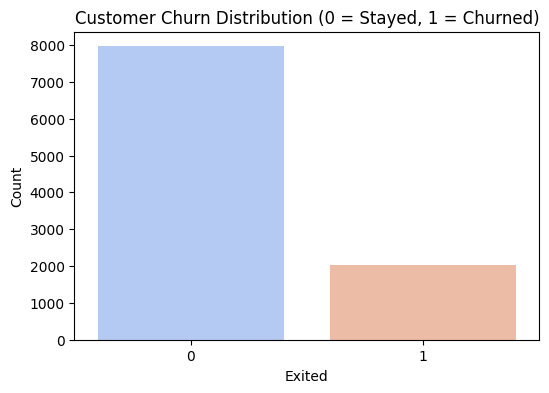

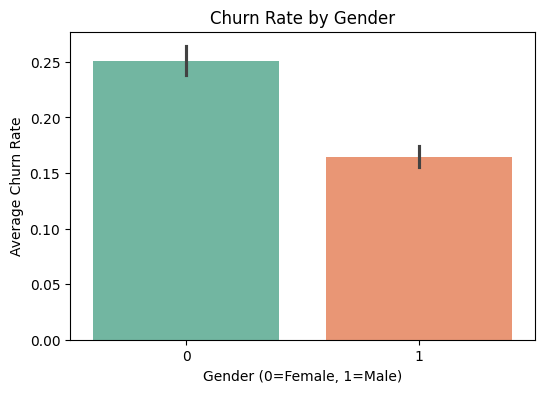

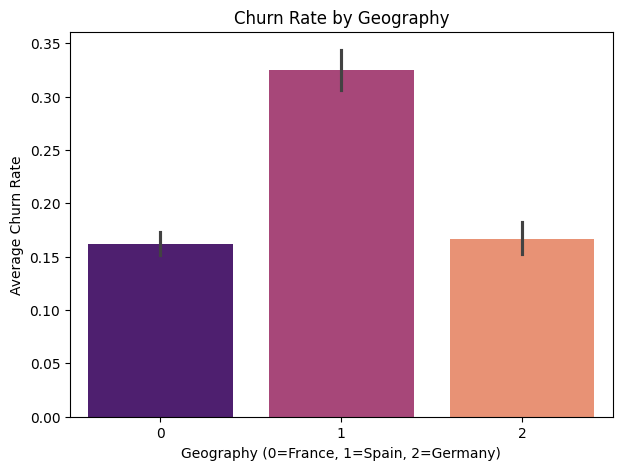

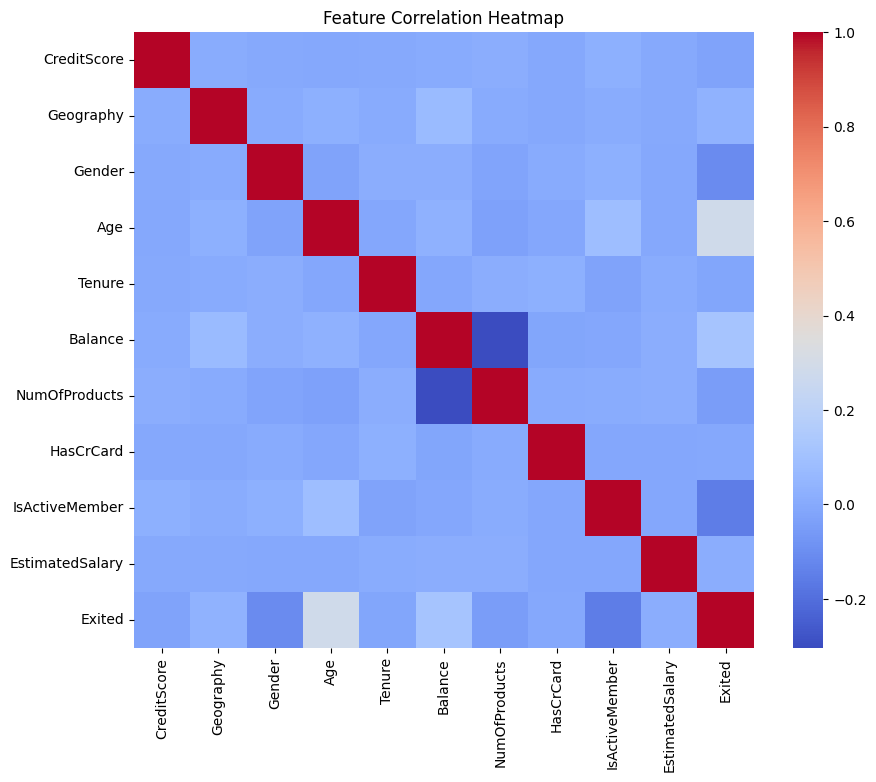

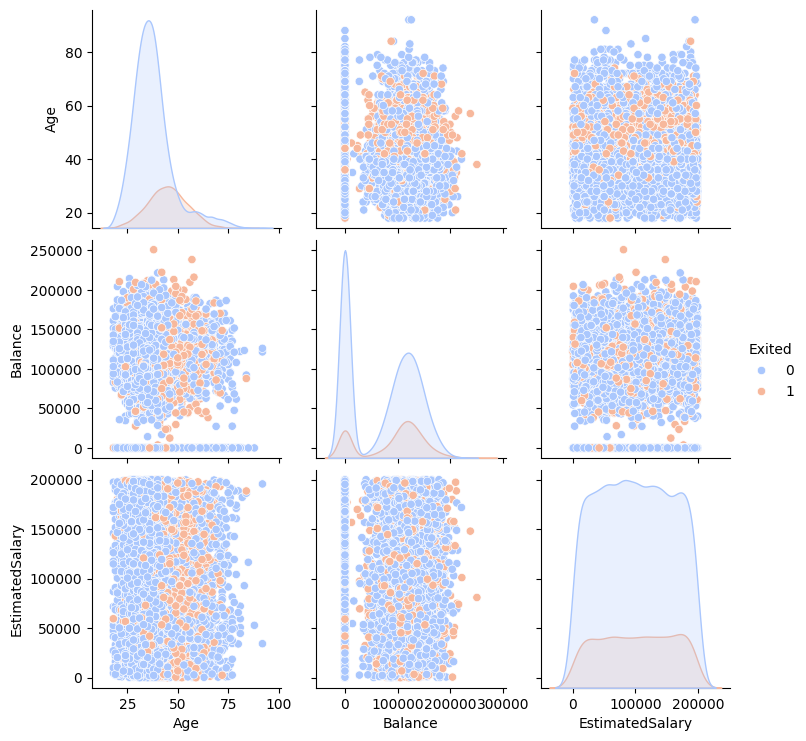

In [ ]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title('Customer Churn Distribution (0 = Stayed, 1 = Churned)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

#  Churn by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Exited', data=df, palette='Set2')
plt.title("Churn Rate by Gender")
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Average Churn Rate')
plt.show()

#  Churn by Geography
plt.figure(figsize=(7,5))
sns.barplot(x='Geography', y='Exited', data=df, palette='magma')
plt.title("Churn Rate by Geography")
plt.xlabel('Geography (0=France, 1=Spain, 2=Germany)')
plt.ylabel('Average Churn Rate')
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

#  Pairplot of Important Features
sns.pairplot(df[['Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='coolwarm')
plt.show()


Feature / Target Split

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

 Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


 Feature Scaling

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Model (Random Forest)

In [16]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)

print("\n🚀 Training Random Forest model...")
rf.fit(X_train_scaled, y_train)



🚀 Training Random Forest model...


,n_estimators,200
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Evaluation


✅ Model Evaluation Results:
Accuracy: 0.845
ROC-AUC: 0.8552

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.84      0.84      0.84      2000



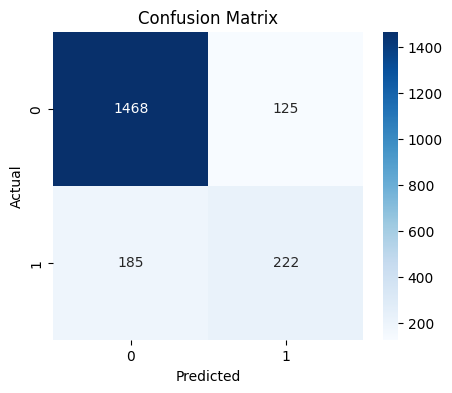

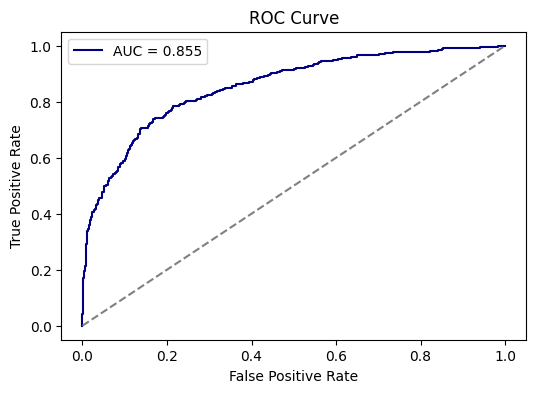

In [ ]:
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

print("\n Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}", color='navy')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Feature Importance Visualization

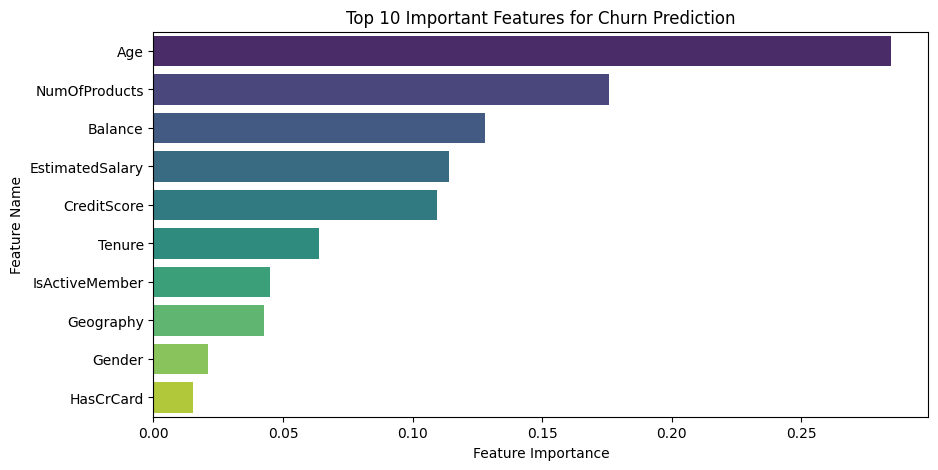

In [18]:
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette='viridis')
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()

Predict Example Customer

In [19]:
sample = pd.DataFrame({
    'CreditScore':[600],
    'Geography':[le_geo.transform(['France'])[0]],
    'Gender':[le_gender.transform(['Male'])[0]],
    'Age':[40],
    'Tenure':[3],
    'Balance':[60000],
    'NumOfProducts':[2],
    'HasCrCard':[1],
    'IsActiveMember':[1],
    'EstimatedSalary':[50000]
})

sample_scaled = scaler.transform(sample)
pred = rf.predict(sample_scaled)[0]

print("\n🧩 Example Prediction:")
print("Prediction:", "❌ Customer Likely to Churn" if pred == 1 else "✅ Customer Likely to Stay")



🧩 Example Prediction:
Prediction: ✅ Customer Likely to Stay


Save Model and Scaler

In [20]:
joblib.dump(rf, "bank_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_geo, "geo_encoder.pkl")
joblib.dump(le_gender, "gender_encoder.pkl")

print("\n💾 Model and encoders saved successfully!")


💾 Model and encoders saved successfully!
